**Deep Fake Recognition using Deep Learning Techniques**


In [1]:
!pip install Kaggle
!pip install -U tensorflow-addons
!pip install scikit-learn==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

100% 3.74G/3.75G [00:27<00:00, 112MB/s]
100% 3.75G/3.75G [00:27<00:00, 146MB/s]


In [4]:
import pandas as pd
import os

Only use if there are zipped files in your google drive folder. (Only need to use this once)

In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/140k-real-and-fake-faces.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
def getFilecount(path):
  # folder path
  dir_path = path
  count = 1
  # Iterate directory
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
  return count


In [7]:
def deleteFile(path,num ):
  # folder path
  dir_path = path
  count = 1
  # Iterate directory
  for path in os.listdir(dir_path):
      # check if current path is a file
      
      im = os.path.isfile(os.path.join(dir_path, path))
      if im:
        imf=os.path.join(dir_path, path)
        os.remove(imf)
        if (count == num):
          break
        else:
          count +=1
      
  print('File deleted:', count)


In [8]:
import os


# # folder path
dir_path = r'/content/real_vs_fake/real-vs-fake/test/fake'
print( "Total file count", getFilecount(dir_path))
deleteFile(dir_path , 9000 )

print( "after delete file count", getFilecount(dir_path))




Total file count 10001
File deleted: 9000
after delete file count 1001


In [9]:
import os

# folder path
dir_path = r'/content/real_vs_fake/real-vs-fake/test/real'
print( "Total file count", getFilecount(dir_path))
deleteFile(dir_path ,9000 )

print( "after delete file count", getFilecount(dir_path))


Total file count 10001
File deleted: 9000
after delete file count 1001


In [10]:

# folder path
dir_path = r'/content/real_vs_fake/real-vs-fake/train/fake'
print( "Total file count", getFilecount(dir_path))
deleteFile(dir_path ,46000 )

print( "after delete file count", getFilecount(dir_path))


Total file count 50001
File deleted: 46000
after delete file count 4001


In [11]:
import os

# folder path
dir_path = r'/content/real_vs_fake/real-vs-fake/train/real'
print( "Total file count", getFilecount(dir_path))
deleteFile(dir_path ,46000 )

print( "after delete file count", getFilecount(dir_path))

Total file count 50001
File deleted: 46000
after delete file count 4001


In [12]:
import os

# folder path
dir_path = r'/content/real_vs_fake/real-vs-fake/valid/fake'
print( "Total file count", getFilecount(dir_path))
deleteFile(dir_path ,9000 )

print( "after delete file count", getFilecount(dir_path))

Total file count 10001
File deleted: 9000
after delete file count 1001


In [13]:
import os

# folder path
dir_path = r'/content/real_vs_fake/real-vs-fake/valid/real'
print( "Total file count", getFilecount(dir_path))
deleteFile(dir_path ,9000 )

print( "after delete file count", getFilecount(dir_path))

Total file count 10001
File deleted: 9000
after delete file count 1001


View a sample image

In [ ]:
#import cv2
#from google.colab.patches import cv2_imshow
#img = "/content/real_vs_fake/real-vs-fake/test/fake/008BYSE725.jpg"
#image = cv2.imread(img)
#cv2_imshow(image)

**Vision Transformer Based Model**

In [14]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix , plot_confusion_matrix

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import random
%matplotlib inline
import cv2

In [15]:
image_size = 224
labels = ('real', 'fake')
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data, dtype='object')

In [16]:
train = get_data("/content/real_vs_fake/real-vs-fake/train")
test = get_data("/content/real_vs_fake/real-vs-fake/test")
print(train.shape)
print(test.shape)

(8000, 2)
(2000, 2)


In [17]:
l = []
for i in train:
    if i[1] == 0:
        l.append('real')
    else:
        l.append('fake')

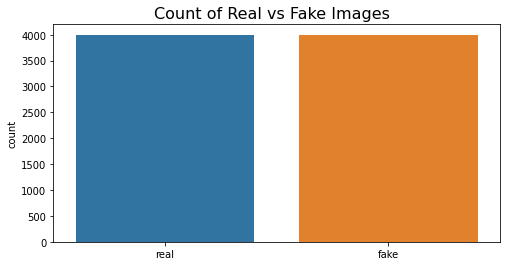

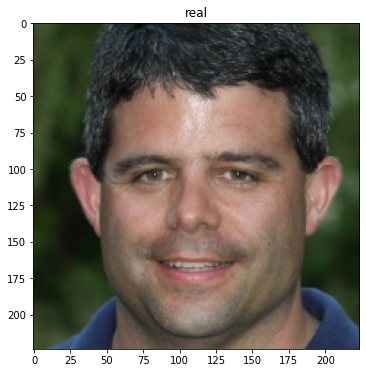

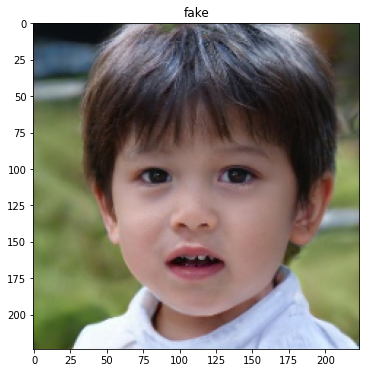

(8000, 224, 224, 3)
(2000, 224, 224, 3)
(8000,)
(2000,)


In [18]:
plt.figure(figsize=(8, 4))
plt.title('Count of Real vs Fake Images  ', size=16)
sns.countplot(x=l)
plt.show()

# randomly visualizing images to see whats going on
plt.figure(figsize=(8, 6))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])
plt.show()

X_train = []
X_test = []
y_train = []
y_test = []

# dividing data into train and test sets
for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

# Normalise the image data (to convert it to range from 0 to 1)
X_train = np.array(X_train)# / 255.0

X_test = np.array(X_test) #/ 255.0

# # Reshaping the image data so that every image is the same size
# #X_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

# #X_test.reshape(-1, image_size, image_size, 1)

y_test = np.array(y_test)


y_test = np.array(y_test)
print (X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [19]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [21]:
num_classes = 2
input_shape = (224, 224, 3)

Vision Transformer Hyperparameters

In [22]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 30
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [23]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

data_augmentation.layers[0].adapt(X_train)

In [24]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [25]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Patch Visualisation

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


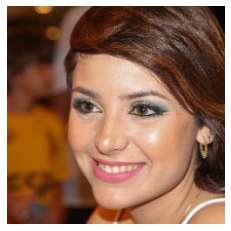

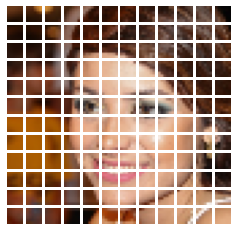

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

Patch Encoder class

In [27]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

Creating VIT Model

In [28]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

Running the VIT Model

Epoch 1/30


29/29 [==============================] - 190s 6s/step - loss: 1.6260 - accuracy: 0.5536 - top-5-accuracy: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.5437 - val_top-5-accuracy: 1.0000
Epoch 2/30
29/29 [==============================] - 157s 5s/step - loss: 0.7250 - accuracy: 0.5821 - top-5-accuracy: 1.0000 - val_loss: 0.6037 - val_accuracy: 0.7250 - val_top-5-accuracy: 1.0000
Epoch 3/30
29/29 [==============================] - 156s 5s/step - loss: 0.6635 - accuracy: 0.6182 - top-5-accuracy: 1.0000 - val_loss: 0.5492 - val_accuracy: 0.8475 - val_top-5-accuracy: 1.0000
Epoch 4/30
29/29 [==============================] - 157s 5s/step - loss: 0.6427 - accuracy: 0.6269 - top-5-accuracy: 1.0000 - val_loss: 0.6111 - val_accuracy: 0.6600 - val_top-5-accuracy: 1.0000
Epoch 5/30
29/29 [==============================] - 156s 5s/step - loss: 0.6241 - accuracy: 0.6568 - top-5-accuracy: 1.0000 - val_loss: 0.5006 - val_accuracy: 0.8213 - val_top-5-accuracy: 1.0000
Epoch 6/30
29/29 [==================

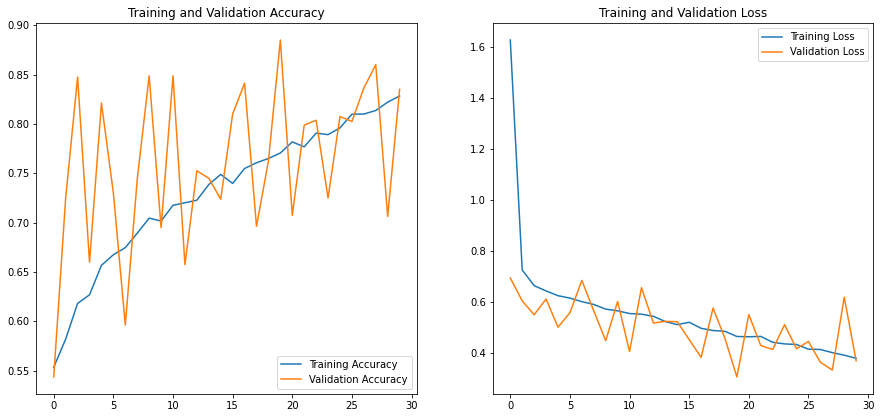

[[0.80089485 0.25678119]
 [0.19910515 0.74321881]]


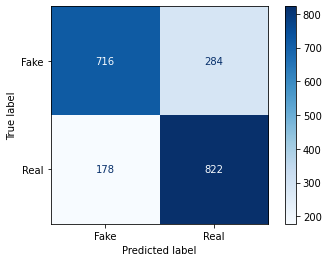

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # checkpoint_filepath = "/tmp/checkpoint"
    # checkpoint_callback = keras.callbacks.ModelCheckpoint(
    #     checkpoint_filepath,
    #     monitor="val_accuracy",
    #     save_best_only=True,
    #     save_weights_only=True,
    # )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
    )
    predictions = np.argmax(model.predict(X_test), axis=-1)

# Regain the original shape to evaluate predictions
    predictions = predictions.reshape(1, -1)[0]

    # Let’s also print the classification report to get more detailed results. (save it to pickel , early stopping)
    print(classification_report(y_test, predictions, target_names=['Healthy(class 0)', 'UnHealthy(class 1)']))
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions) * 100)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # should be 5 for now should be 50
    epochs_range = range(30)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    #building the confusion matrix
    result = confusion_matrix(y_test, predictions , normalize='pred')
    print(result)
    labels = ["Fake", "Real"]
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # model.load_weights(checkpoint_filepath)
    # _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    # print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    # print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

**Efficient Net Implementation** 

In [30]:
base_model = tf.keras.applications.efficientnet.EfficientNetB7(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


base_model.trainable = False

# keras tuner to find the best architecture

model = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(2, activation='softmax')])

model.compile(optimizer=keras.optimizers.Adam(0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# callback for early stopping
# patience is the number of epochs wth no improvement after which the training will be stopped
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

250/250 [==============================] - 129s 518ms/step - loss: 0.3750 - accuracy: 0.8296 - val_loss: 0.3637 - val_accuracy: 0.8390
Epoch 21/50
250/250 [==============================] - 130s 519ms/step - loss: 0.3741 - accuracy: 0.8314 - val_loss: 0.3640 - val_accuracy: 0.8385
Epoch 22/50
250/250 [==============================] - 110s 440ms/step - loss: 0.3726 - accuracy: 0.8325 - val_loss: 0.3624 - val_accuracy: 0.8370
Epoch 23/50
250/250 [==============================] - 129s 518ms/step - loss: 0.3731 - accuracy: 0.8324 - val_loss: 0.3608 - val_accuracy: 0.8400
Epoch 24/50
250/250 [==============================] - 110s 440ms/step - loss: 0.3716 - accuracy: 0.8298 - val_loss: 0.3647 - val_accuracy: 0.8370
Epoch 25/50
250/250 [==============================] - 129s 517ms/step - loss: 0.3807 - accuracy: 0.8305 - val_loss: 0.3519 - val_accuracy: 0.8500
Epoch 26/50
250/250 [==============================] - 110s 439ms/step - loss: 0.3708 - accuracy: 0.8288 - val_loss: 0.3697 - val_

Efficient Net Results

63/63 [==============================] - 22s 345ms/step
[0 0 0 ... 1 1 1]
               precision    recall  f1-score   support

real(class 0)       0.90      0.78      0.83      1000
fake(class 1)       0.80      0.91      0.85      1000

     accuracy                           0.84      2000
    macro avg       0.85      0.84      0.84      2000
 weighted avg       0.85      0.84      0.84      2000

Accuracy:  84.25


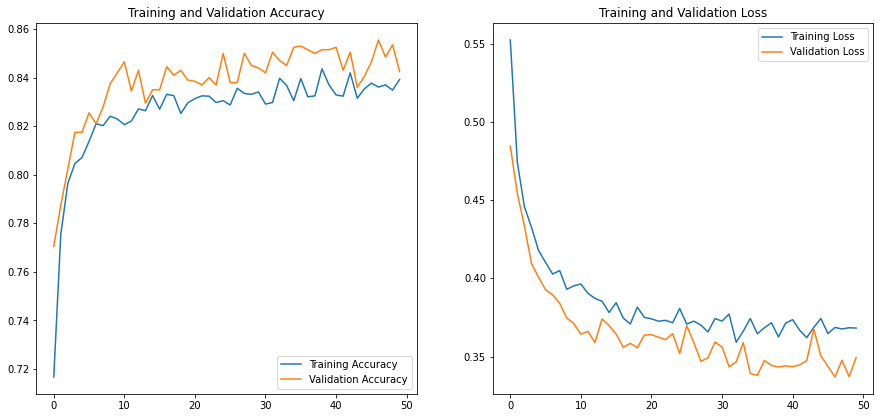

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

predictions = np.argmax(model.predict(X_test), axis=-1)
predictions = predictions.reshape(1, -1)[0]
print(predictions)

    # Let’s also print the classification report to get more detailed results. (save it to pickel , early stopping)
print(classification_report(y_test, predictions, target_names=['real(class 0)', 'fake(class 1)']))
print("Accuracy: ", metrics.accuracy_score(y_test, predictions) * 100)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

    # should be 5 for now should be 50
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()